In [ ]:
import enum
import seaborn as sns
from data_handling.Data_Processor import DataProcessor
import constants
import os
from statistics_methods.Statistics import StatisticsWrapper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

: 

In [2]:
raw_data_path = constants.PATH_TO_CORTEX_4_PARAMS_RAW
chosen_rois_dict = constants.ROI_CORTEX
params_to_work_with = ['r1', 'tv', 'mt', 'r2s']

In [3]:
%load_ext autoreload
%autoreload 2

subjects_raw_data = DataProcessor(raw_data_path, chosen_rois_dict, chosen_rois_dict).get_data_proccessed()
analyzed_data = StatisticsWrapper.calc_mean_per_subject_per_parameter_per_ROI(subjects_raw_data, params_to_work_with)
chosen_data = StatisticsWrapper.chose_relevant_data(analyzed_data, chosen_rois_dict, params_to_work_with, params_to_work_with)

In [4]:
chosen_data['tv'].describe()

count    2318.000000
mean        0.193941
std         0.018449
min         0.132638
25%         0.181653
50%         0.194235
75%         0.206266
max         0.248065
Name: tv, dtype: float64

In [5]:
group_a_name, group_b_name, col_divider, threshold = constants.YOUNG, constants.OLD, 'Age', constants.AGE_THRESHOLD
young_subjects, old_subjects = StatisticsWrapper.seperate_data_to_two_groups(chosen_data, col_divider, threshold)

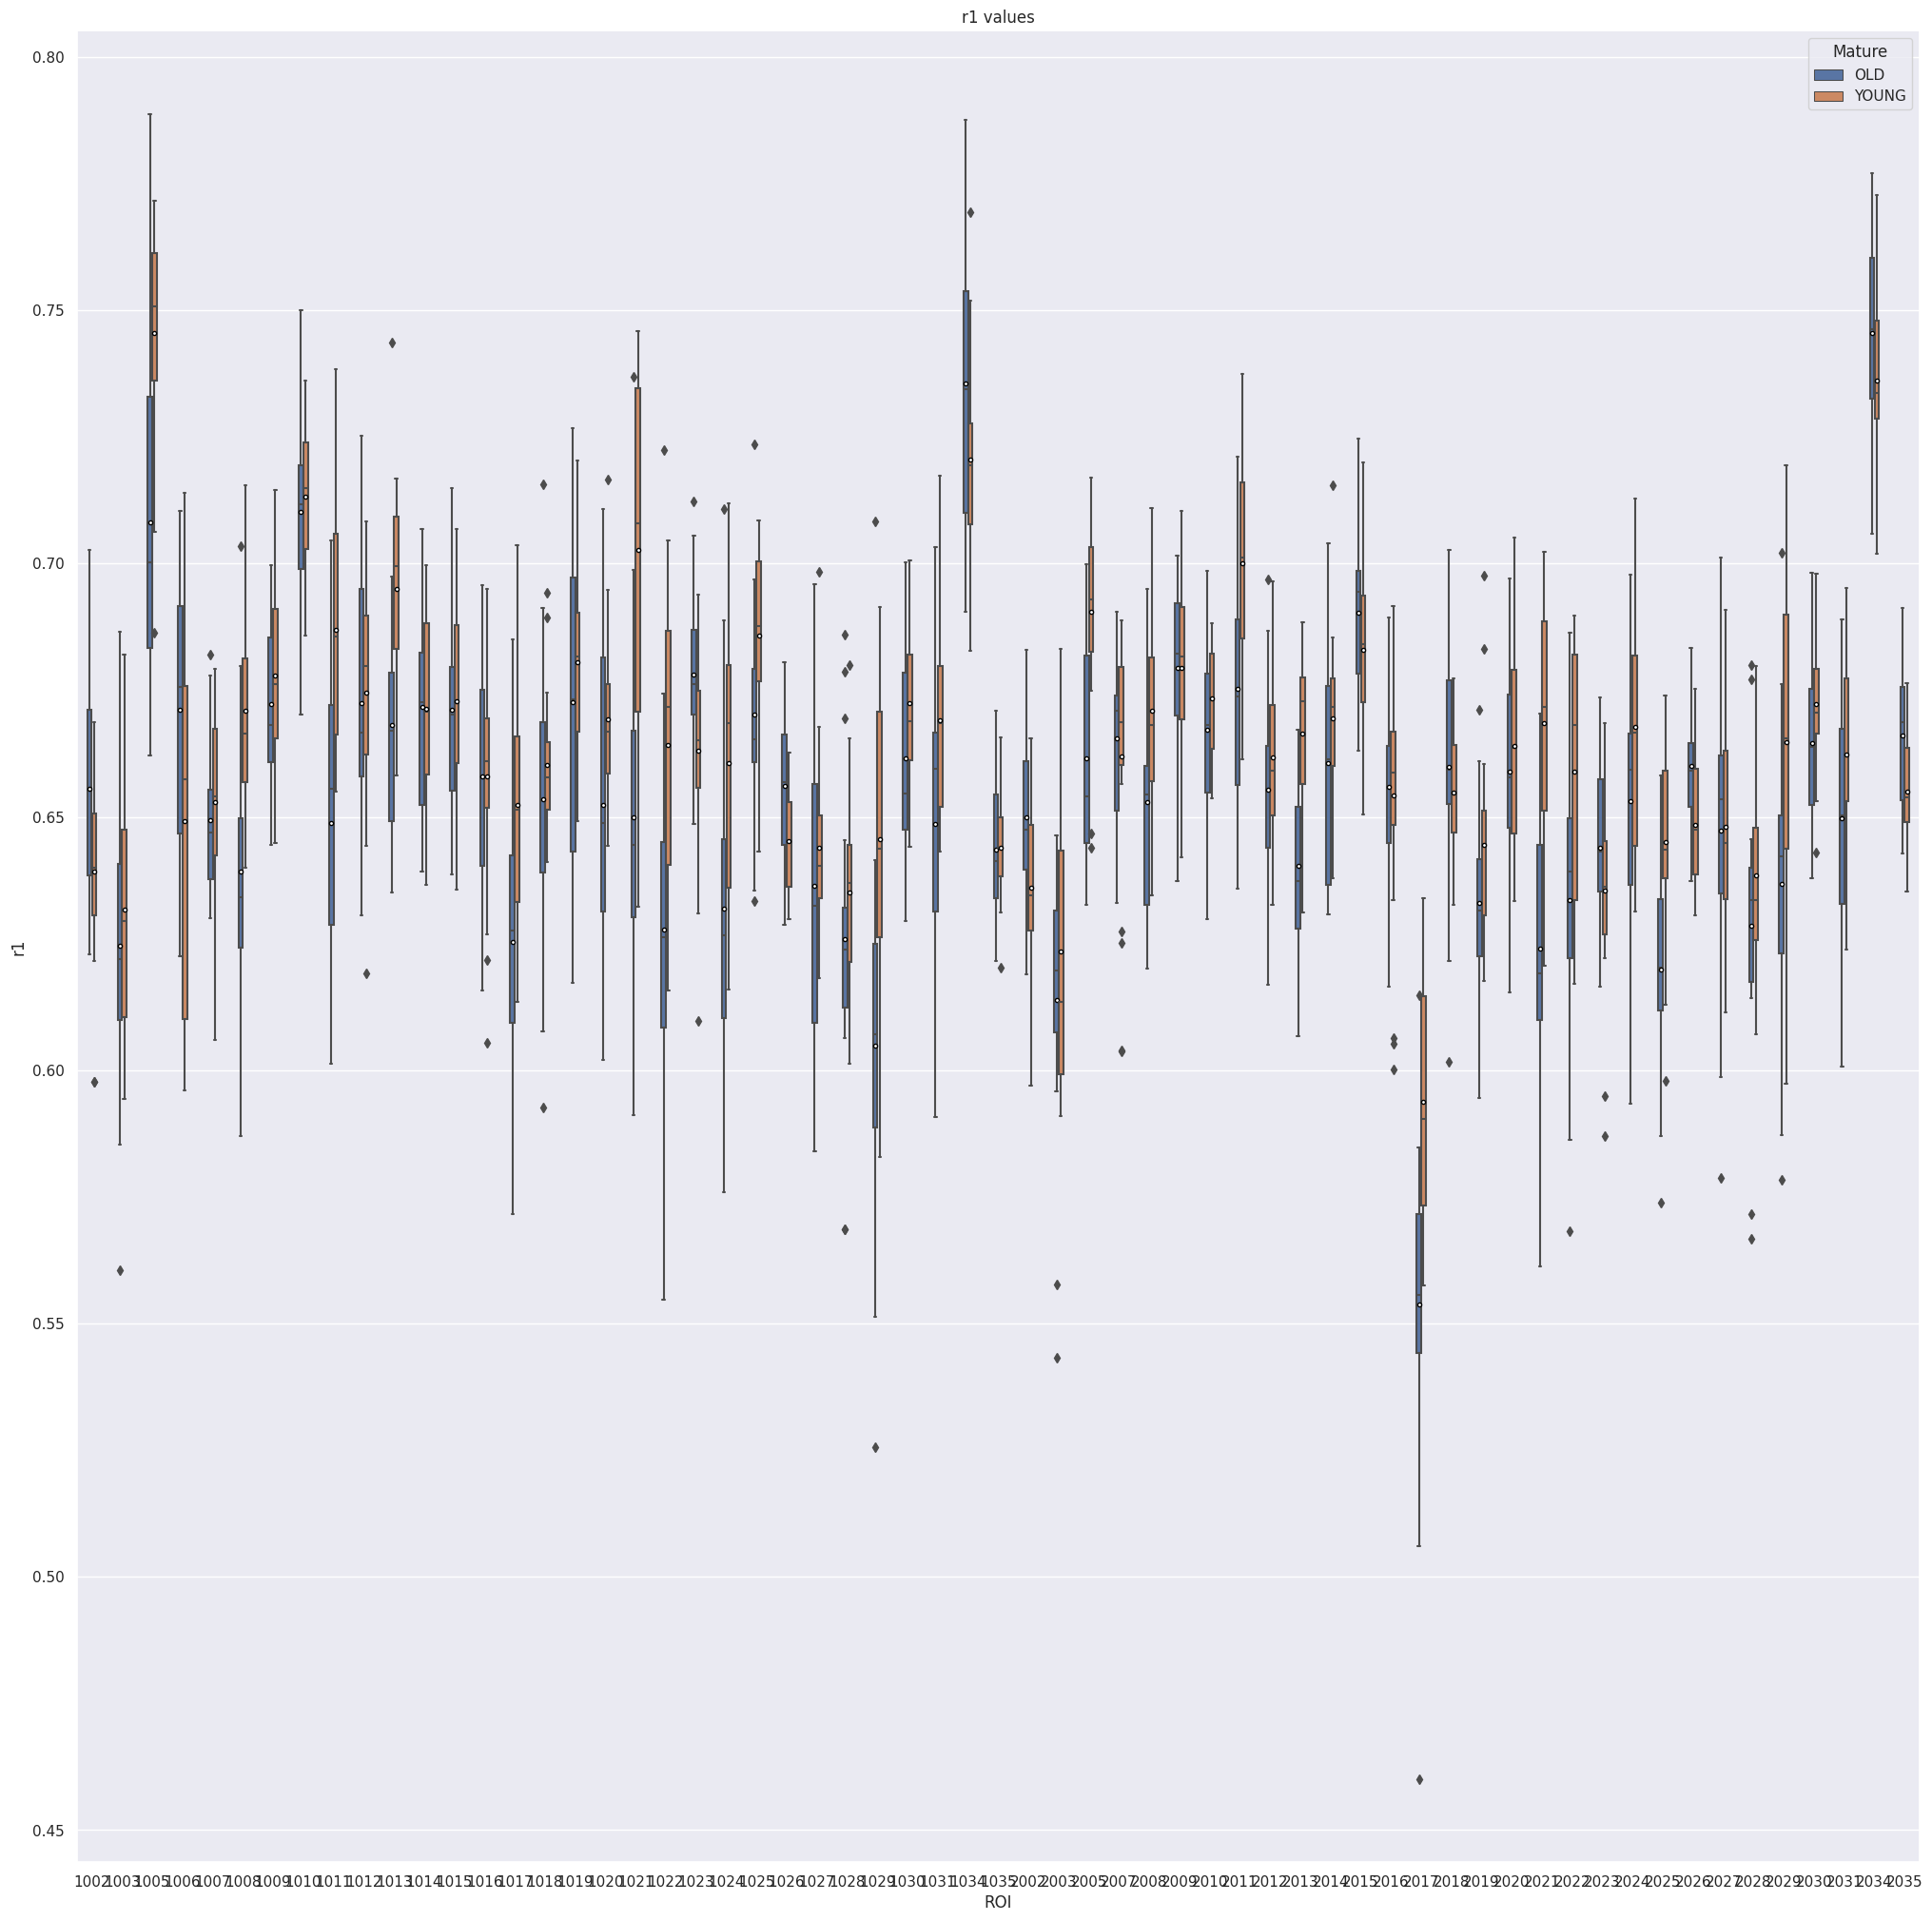

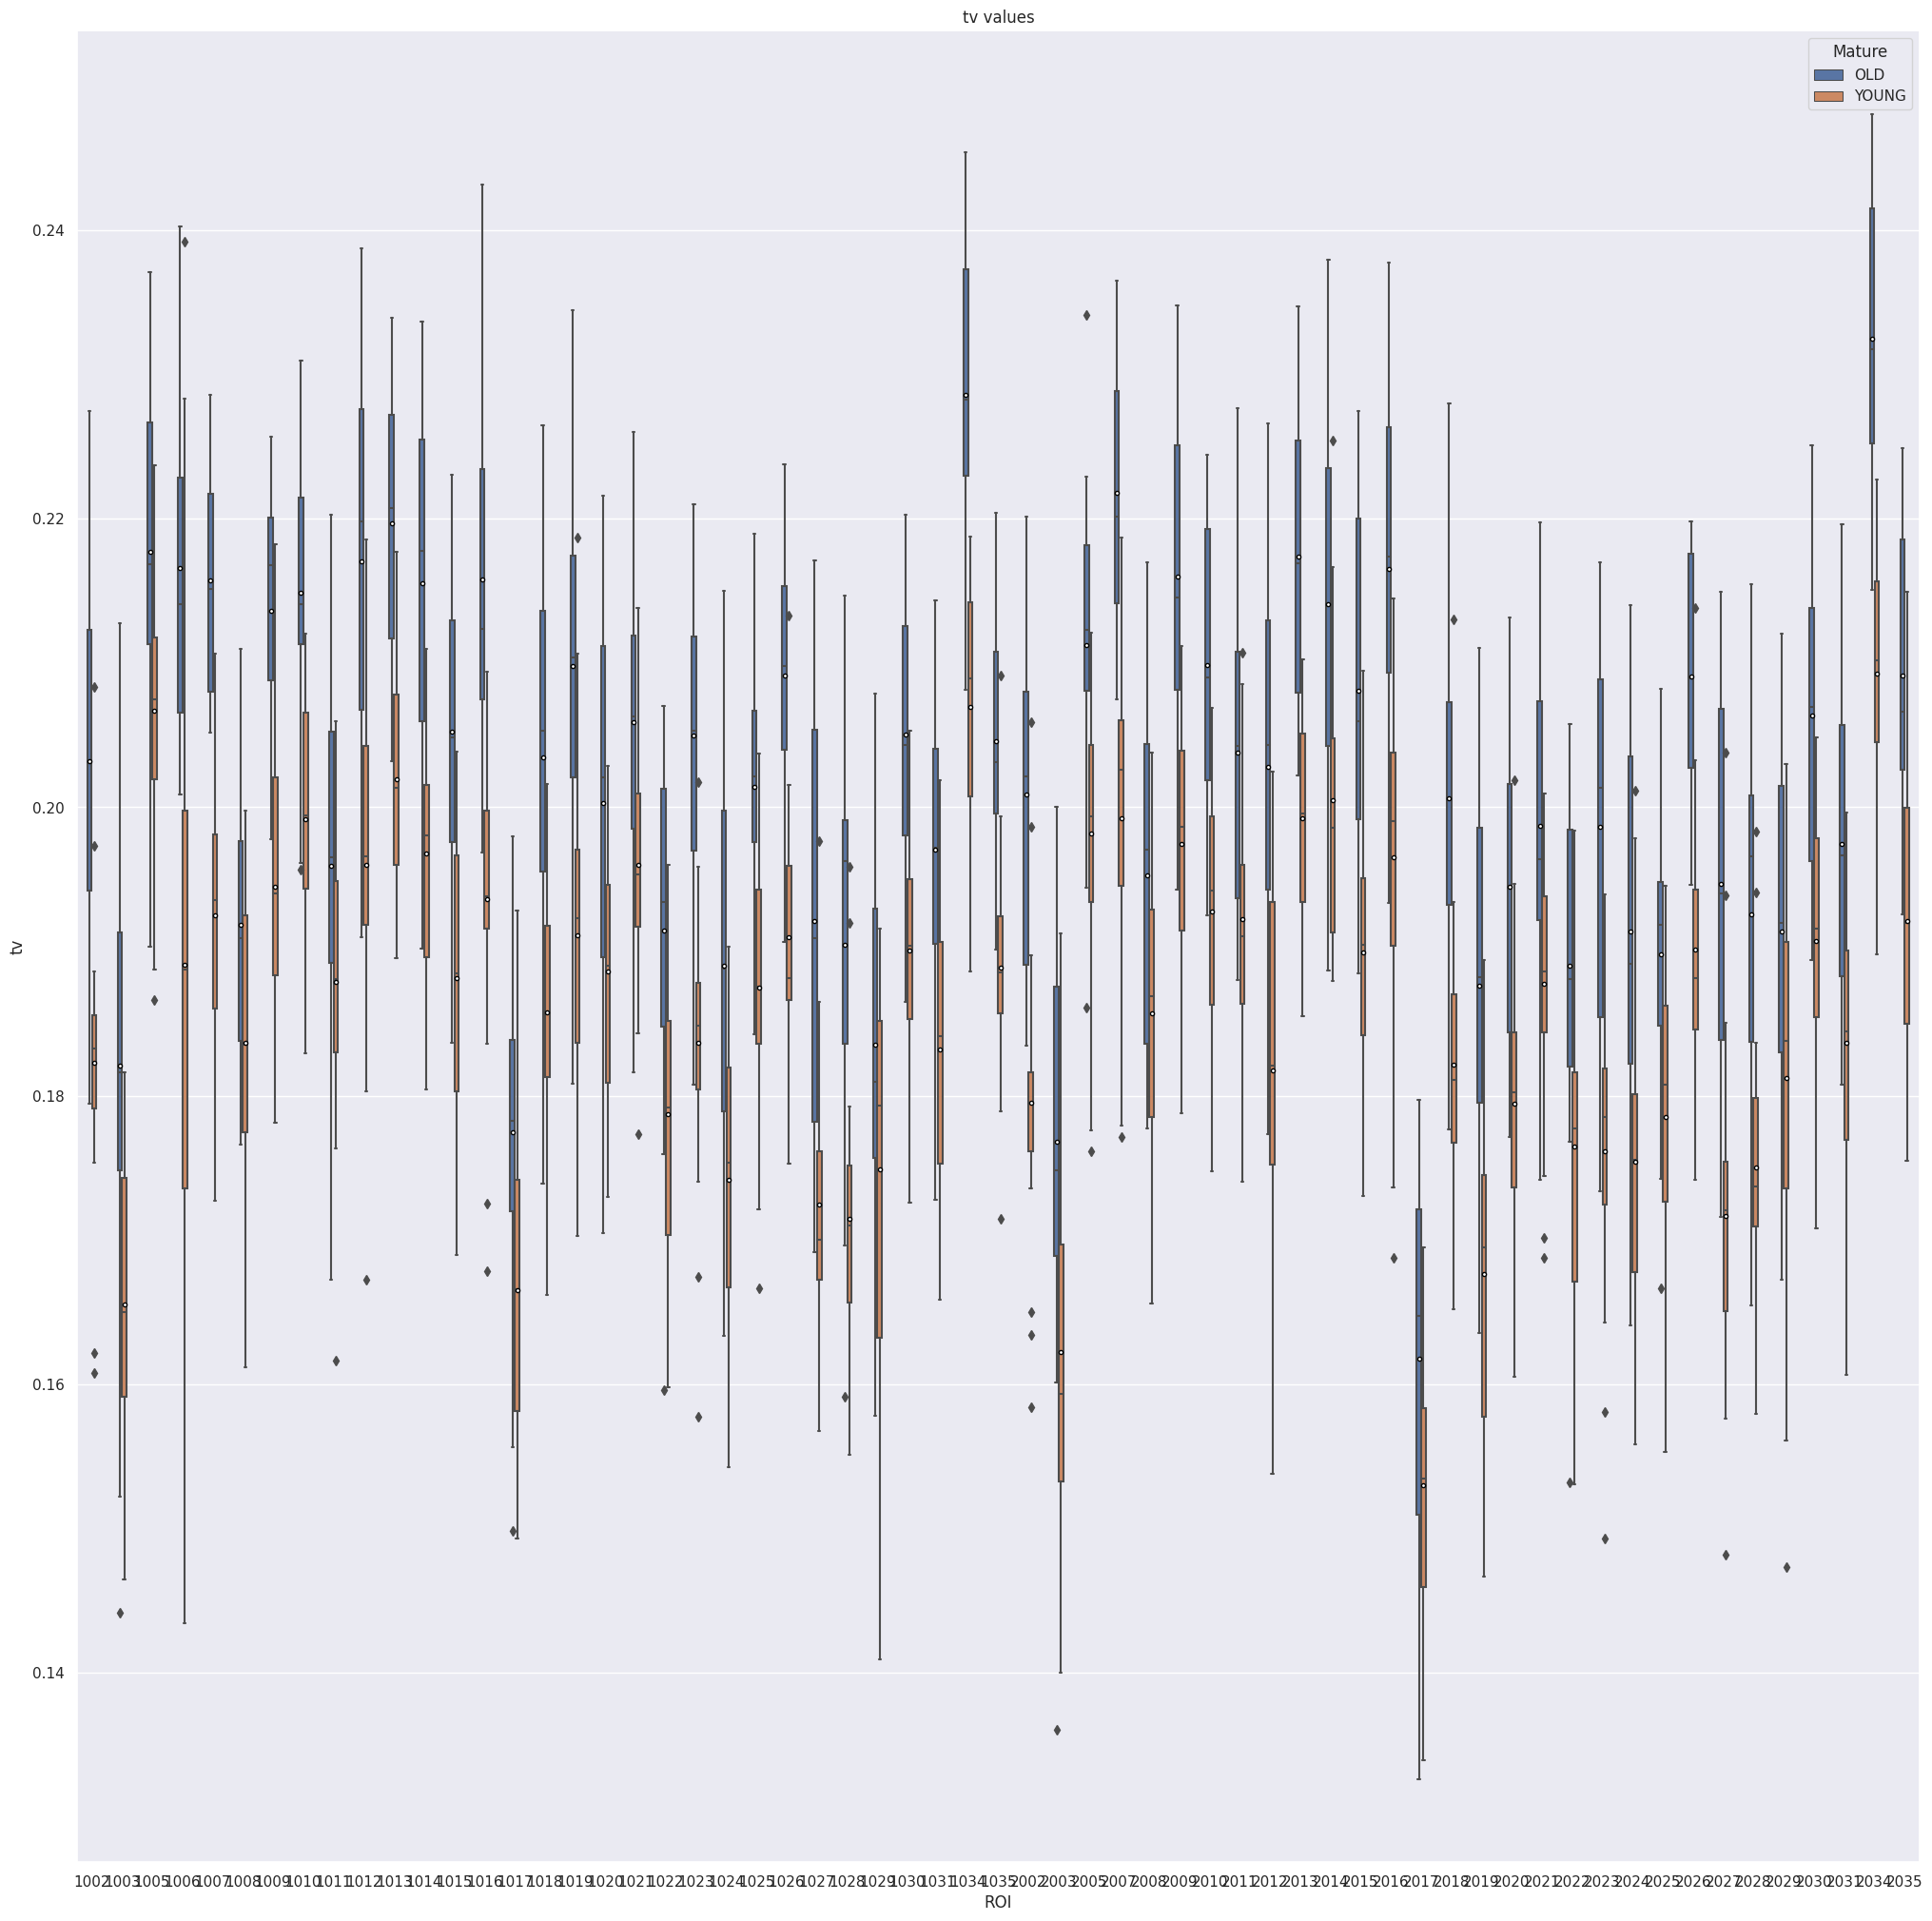

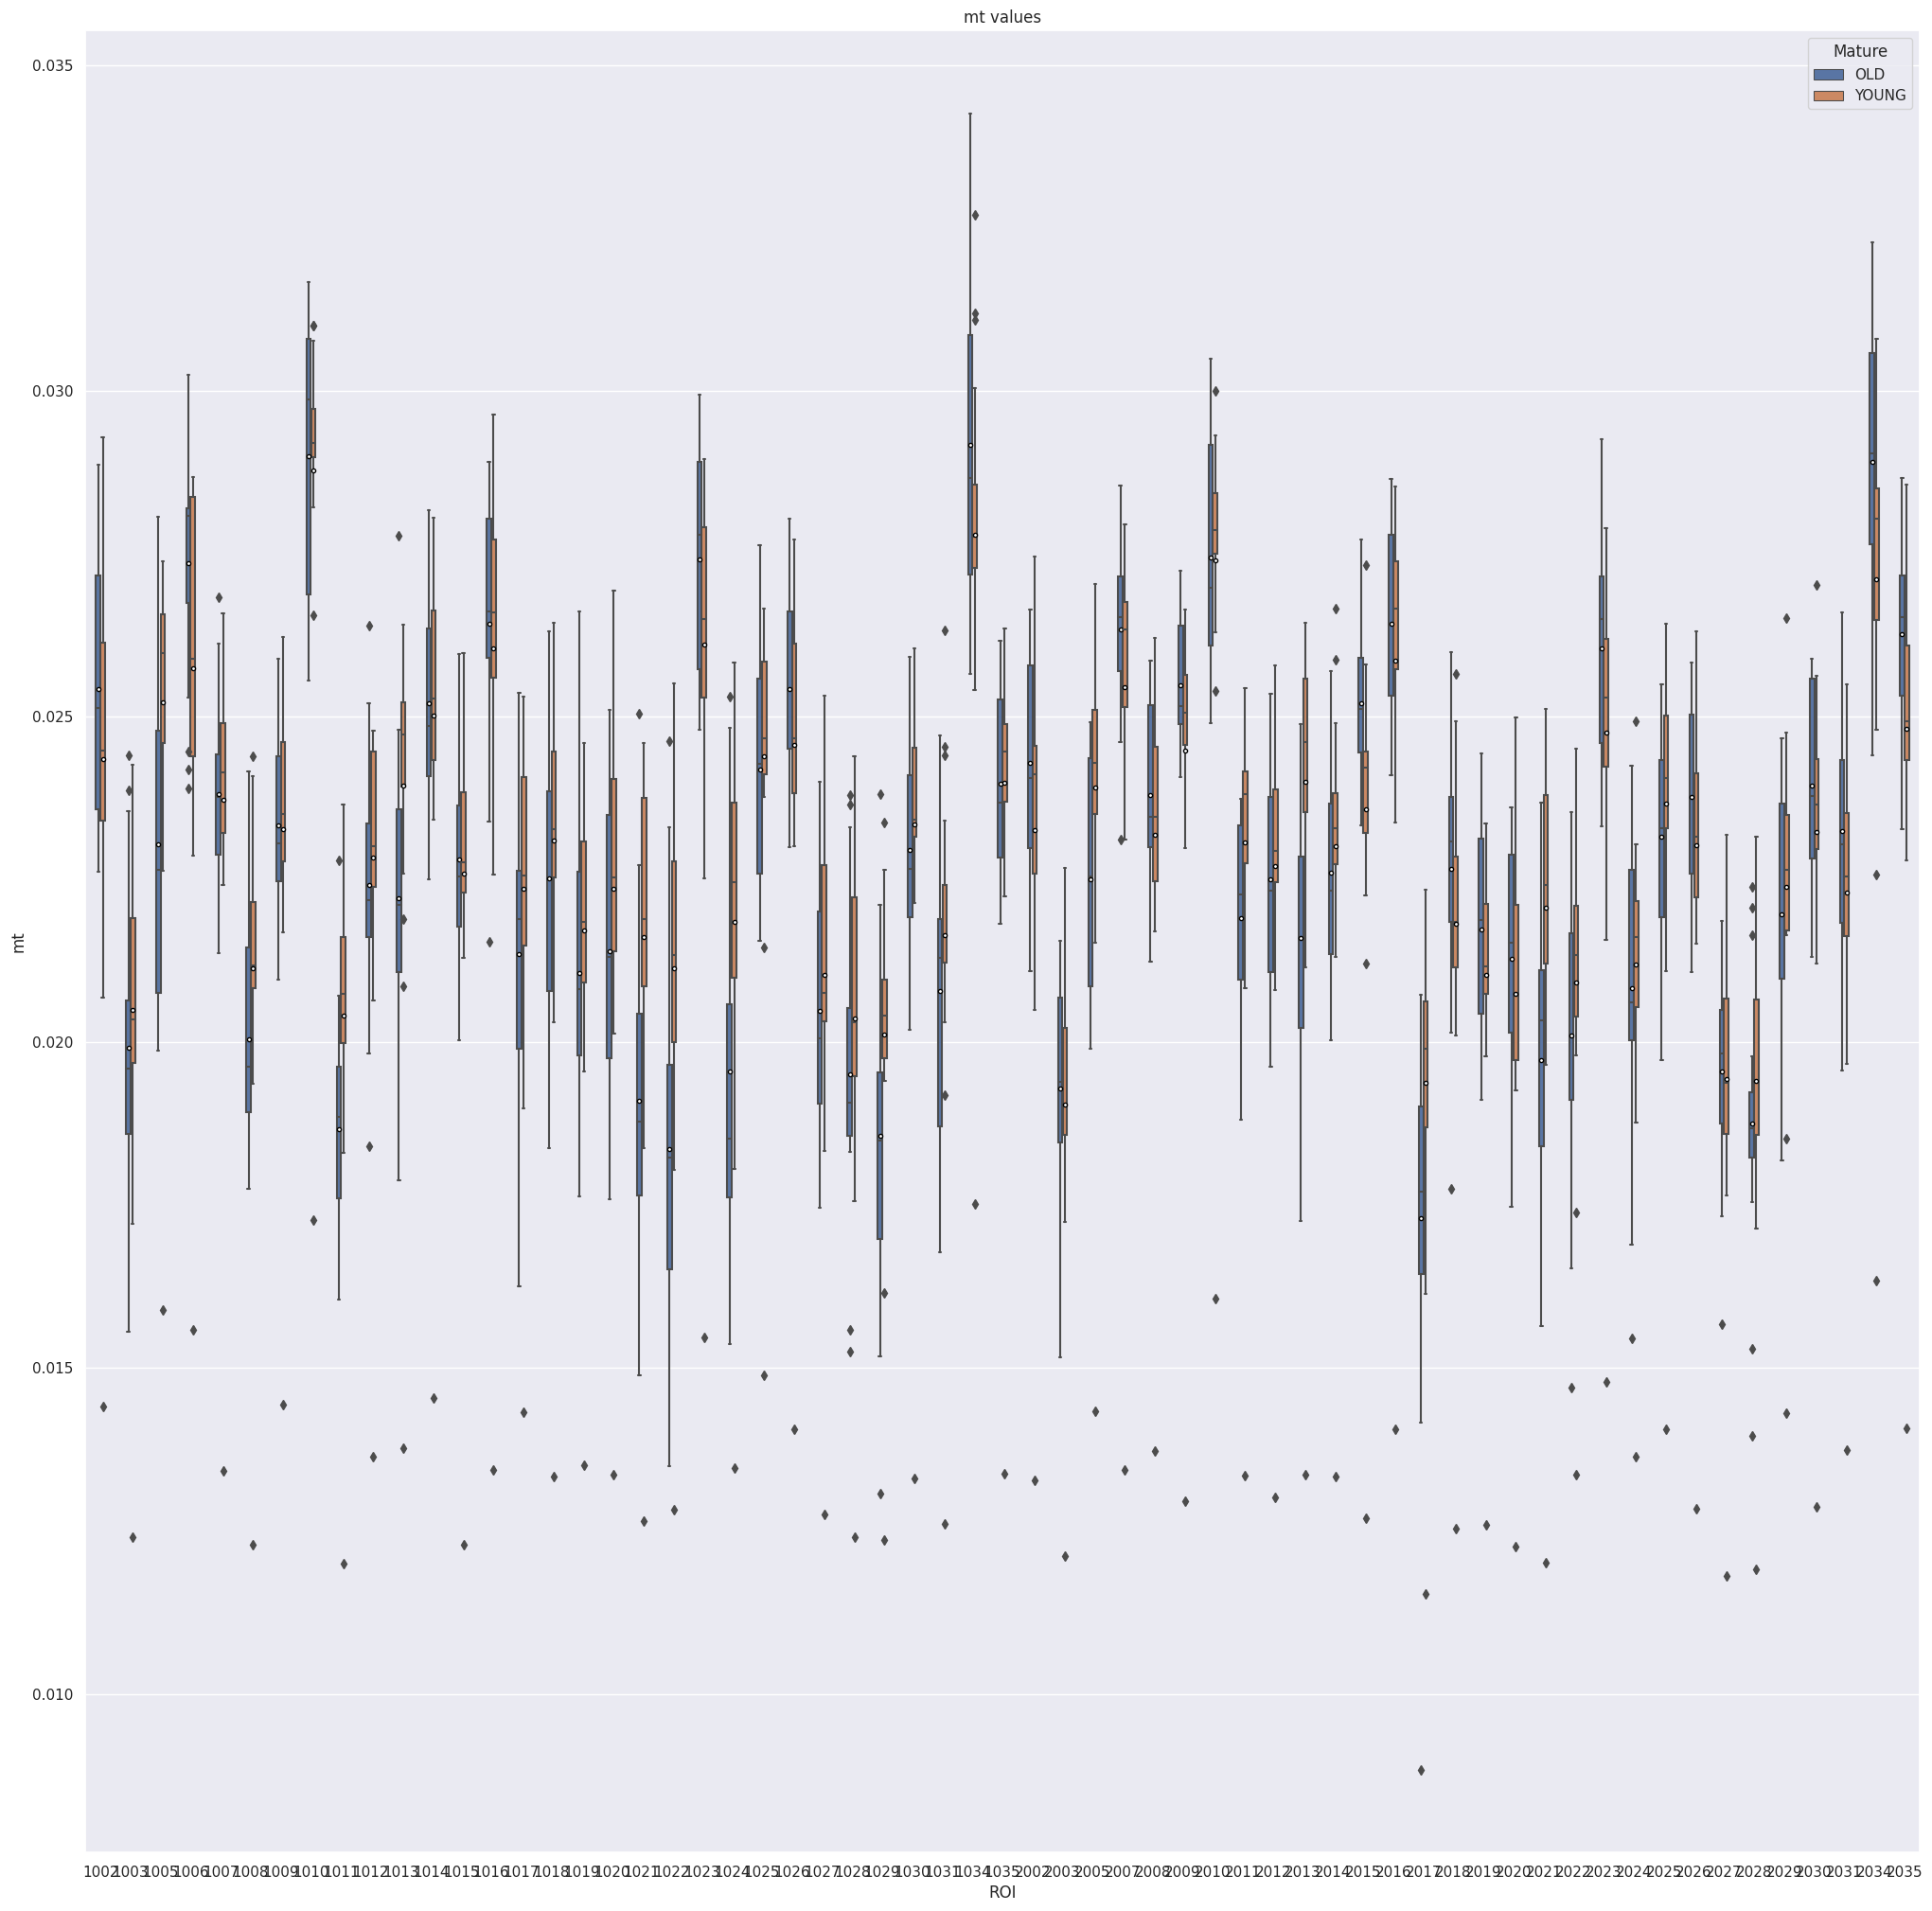

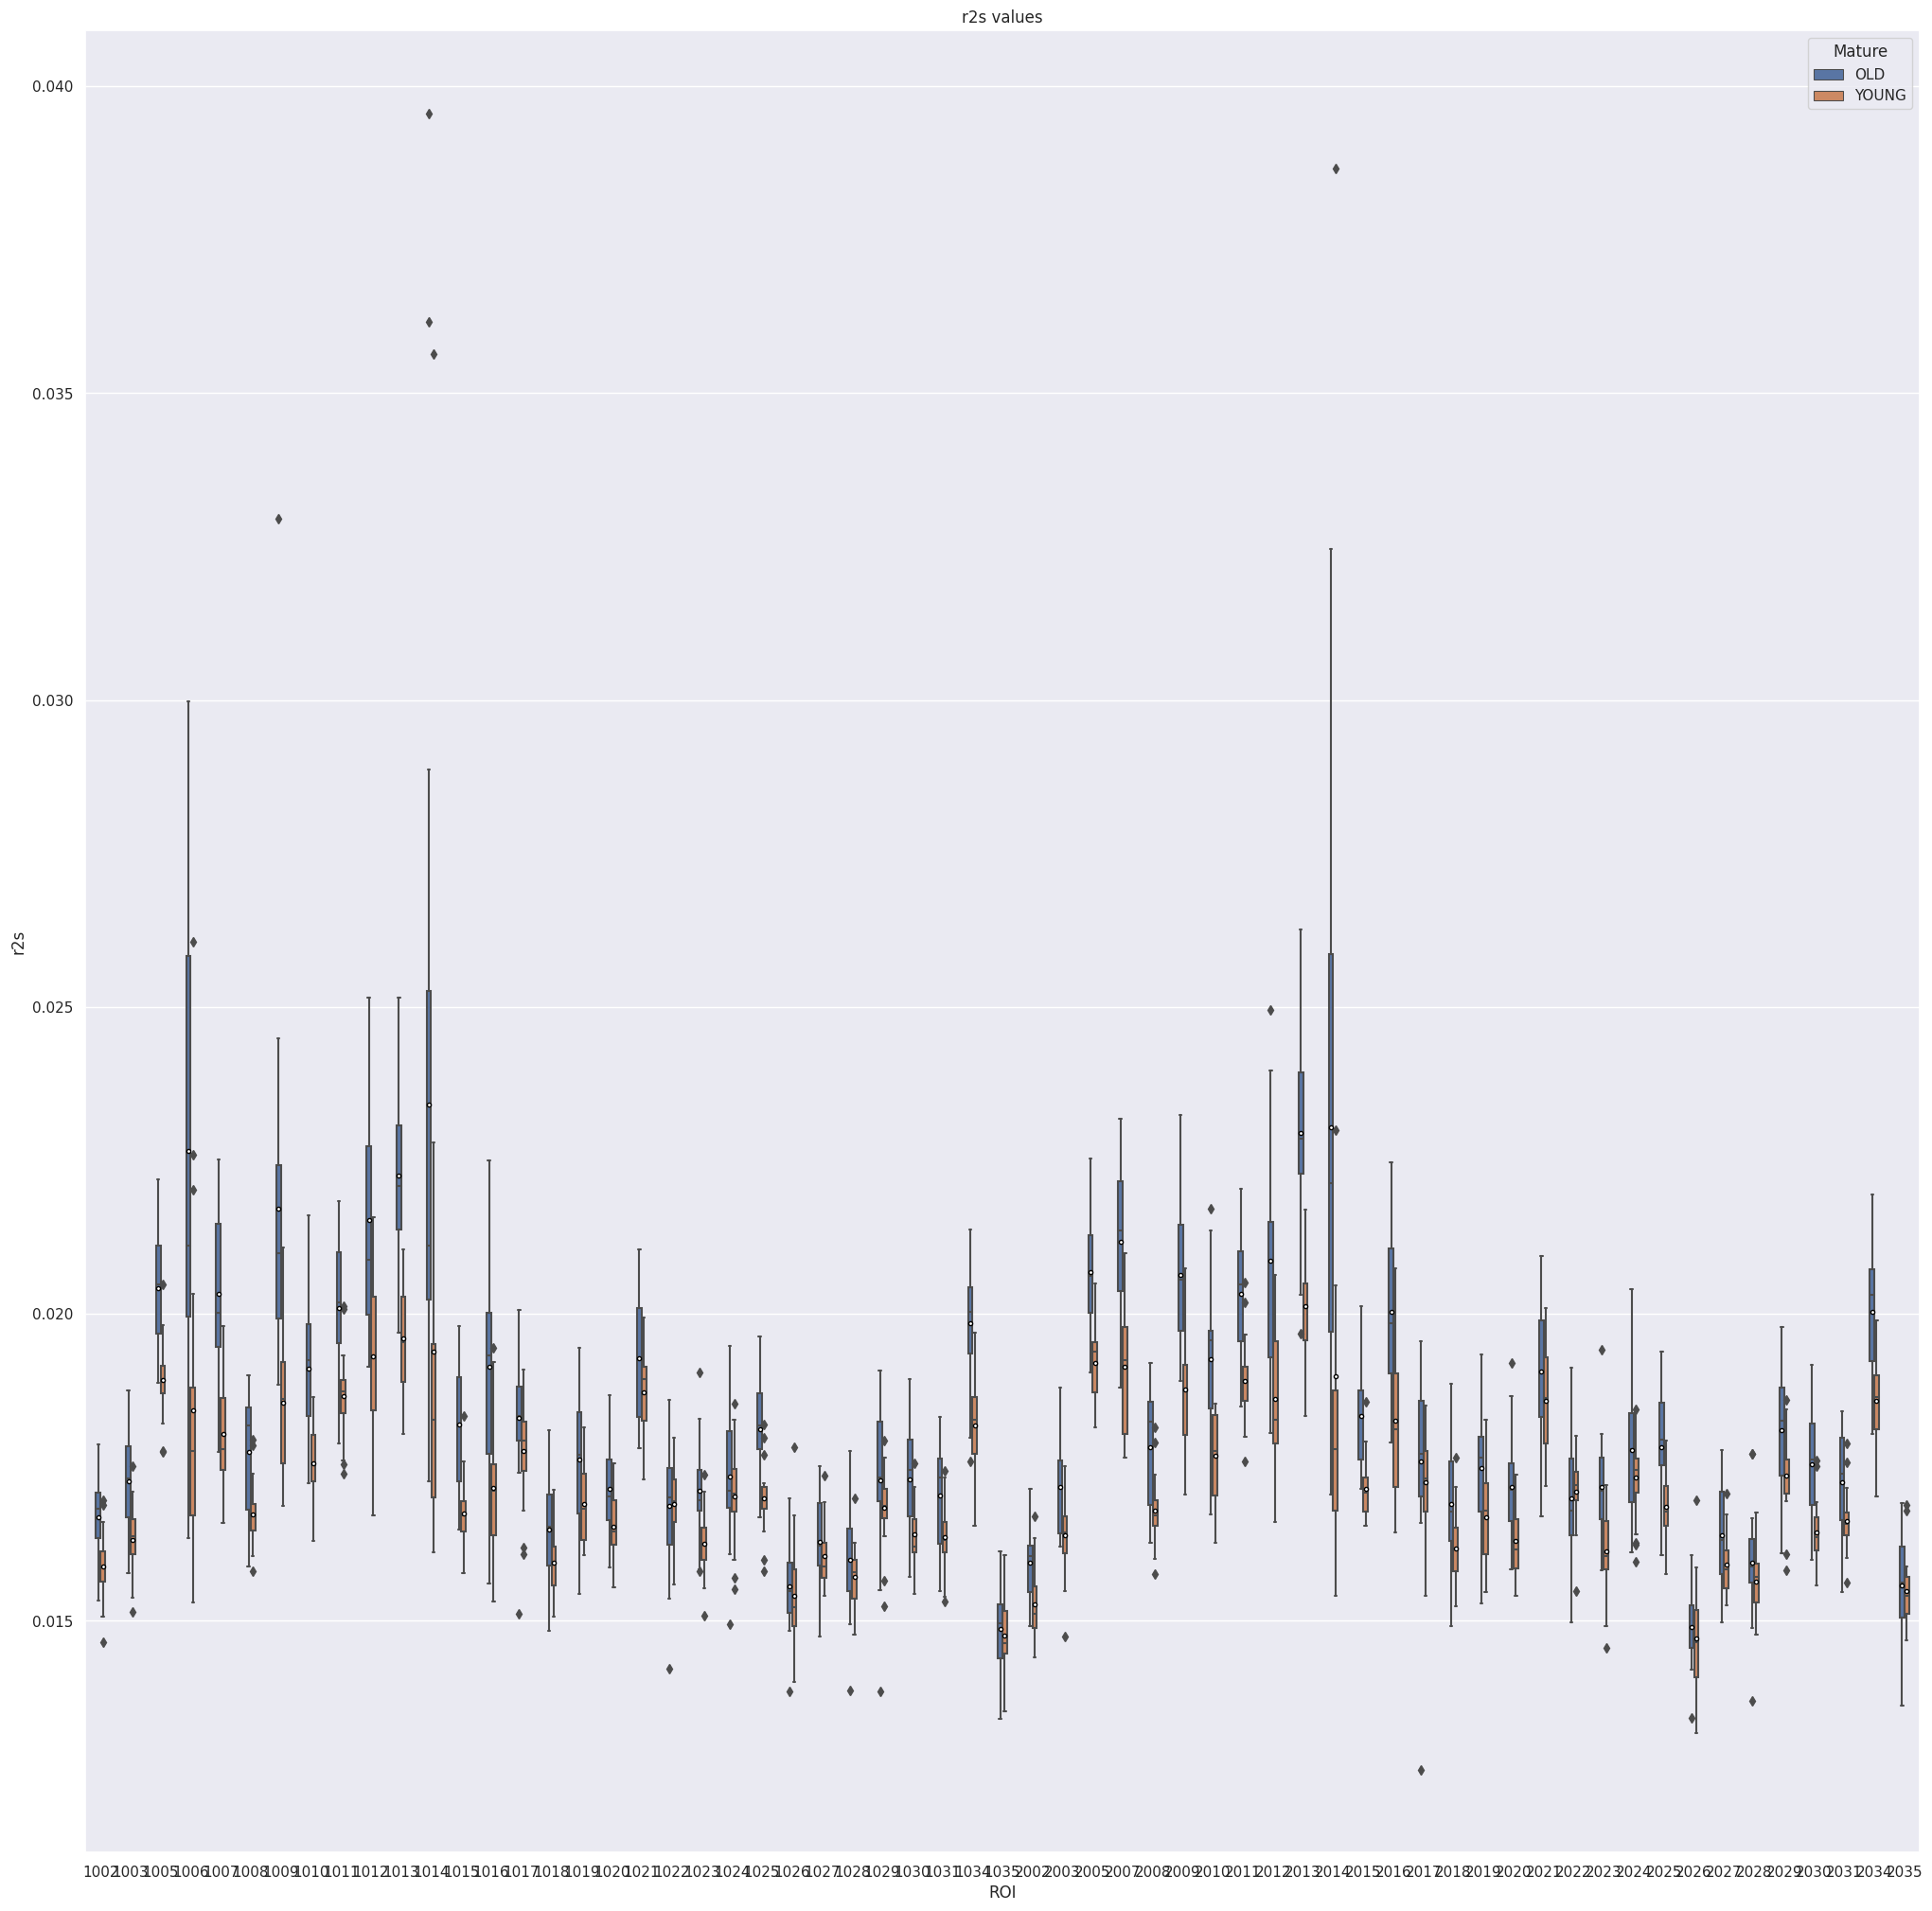

In [6]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(young_subjects, old_subjects,
                                                                    params_to_work_with,
                                                                    group_a_name, group_b_name)

In [7]:
def extract_outliers(data, param):
     outliers = {}
     threshold = 1.5

     for roi_value, roi_name in chosen_rois_dict.items():
          roi_to_check_data = data[data.ROI == roi_value]
          Q1 = roi_to_check_data[param].quantile(0.25)
          Q3 = roi_to_check_data[param].quantile(0.75)
          IQR = Q3 - Q1


          outliers_df = roi_to_check_data[(roi_to_check_data[param] < Q1 - threshold * IQR) | (roi_to_check_data[param] > Q3 + threshold * IQR)]

          if outliers_df.subjects.values.size > 0:
               outliers[roi_value] = outliers_df.subjects.tolist()

     return outliers

In [9]:
for param in params_to_work_with:
    subjects_outliers_counter = {}
    outliers = extract_outliers(chosen_data, param)

    for roi, roi_outliers in outliers.items():
            for outlier in roi_outliers:
                if outlier in subjects_outliers_counter:
                    subjects_outliers_counter[outlier] += 1
                else:
                    subjects_outliers_counter[outlier]  = 1

    subjects_outliers_counter = dict(sorted(subjects_outliers_counter.items(), key=lambda item: item[1], reverse=True))
    # print(f'{param} outliers: {outliers}')
    print(f'{param} outliers counter: {subjects_outliers_counter}')
    print('----------------------------------------------------------')

r1 outliers counter: {'H023_IN': 7, 'H056_LE': 4, 'H050_AB': 4, 'H041_VG': 3, 'H044_AZ': 3, 'H039_JH': 3, 'H054_AE': 3, 'H032_JD': 2, 'H028_LC': 2, 'H053_ED': 2, 'H037_YB': 1, 'H046_NB': 1, 'H055_MY': 1}
----------------------------------------------------------
tv outliers counter: {'H028_LC': 5, 'H018_AS': 3, 'H039_JH': 2, 'H055_MY': 2, 'H054_AE': 2, 'H019_AF': 1}
----------------------------------------------------------
mt outliers counter: {'H056_LE': 58, 'H023_IN': 11, 'H050_AB': 6, 'H032_JD': 2, 'H041_VG': 2, 'H051_YK': 2, 'H054_AE': 2, 'H052_OF': 1, 'H025_SH': 1, 'H030_NS': 1, 'H024_YG': 1, 'H033_MB': 1, 'H022_YR': 1, 'H044_AZ': 1, 'H031_IN': 1, 'H036_EV': 1}
----------------------------------------------------------
r2s outliers counter: {'H039_JH': 10, 'H023_IN': 8, 'H041_VG': 7, 'H033_MB': 4, 'H036_EV': 3, 'H028_LC': 3, 'H021_DH': 2, 'H053_ED': 2, 'H026_LY': 1, 'H024_YG': 1, 'H051_YK': 1, 'H022_YR': 1, 'H018_AS': 1, 'H046_NB': 1}
---------------------------------------------

In [59]:
new_data = chosen_data[~chosen_data.subjects.isin(['H023_IN'])]
new_young_subjects, new_old_subjects = StatisticsWrapper.seperate_data_to_two_groups(new_data, col_divider, threshold)

In [ ]:
plt.close()
StatisticsWrapper.plot_data_per_param_per_roi_next_to_each_other(new_young_subjects, new_old_subjects,
                                                                    ['r1'],
                                                                    group_a_name, group_b_name)

In [18]:
data_path = os.path.join(constants.ANALYSIS_DIR, 'H039_JH')
seg_path = os.path.join(data_path, os.listdir(data_path)[0], constants.BASIC_SEG)
brain_path = os.path.join(data_path, os.listdir(data_path)[0], constants.MAP_R2S)

In [19]:
os.system(f'freeview -v {brain_path} {seg_path}:colormap=lut &')

0